# FIFA 2018 - Assignment 2 (Part A - Linear model)

# Abstract

The data is scraped from the website https://sofifa.com by extracting the Player personal data and Player Ids and then the playing and style statistics in FIFA 2018. In this assignment, we will investigate the relation between variables in order to select the features of the models. We will predict the wage of the players by building the linear regression models.

# Experiments

## Data Preprocessing

In order to select the candidates for training the better model, we have to clean up our data previously. First, we load the data and take a glance of the null or unusual values.

In [224]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import numpy as np
from scipy import stats
from sklearn.metrics import mean_squared_error, mean_squared_log_error
from sklearn.model_selection import cross_val_score

In [225]:
df = pd.read_csv('data.csv', decimal = ',')

In [226]:
df.head(5)

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


There are some variables we may not use, like IDs, photos and so on. We can remove them from our data and form a new data set for predicting the wage.

In [227]:
df = df.drop(columns=['Unnamed: 0', 'ID', 'Photo', 'Nationality', 'Flag', 'Club', 'Club Logo', 'Work Rate', 'Real Face', 'Jersey Number', 'Joined', 'Loaned From', 'Contract Valid Until', 'Body Type', 'Position', 'Release Clause'])

Then for the NaN value. 

## Target Variable

As we want to predict the wage of the players, we can first investigate the wage column as below. First, we check it doesn't exist the NaN value.

In [228]:
df['Wage'].isnull().sum()

0

In [229]:
df.isnull().sum()

Name                           0
Age                            0
Overall                        0
Potential                      0
Value                          0
Wage                           0
Special                        0
Preferred Foot                48
International Reputation      48
Weak Foot                     48
Skill Moves                   48
Height                        48
Weight                        48
LS                          2085
ST                          2085
RS                          2085
LW                          2085
LF                          2085
CF                          2085
RF                          2085
RW                          2085
LAM                         2085
CAM                         2085
RAM                         2085
LM                          2085
LCM                         2085
CM                          2085
RCM                         2085
RM                          2085
LWB                         2085
          

Then, we find out that the wage column contains the special symbols, we can change them into integer value for convenient.

In [230]:
df['Wage']

0        €565K
1        €405K
2        €290K
3        €260K
4        €355K
5        €340K
6        €420K
7        €455K
8        €380K
9         €94K
10       €205K
11       €355K
12       €125K
13       €285K
14       €225K
15       €205K
16       €205K
17       €145K
18       €240K
19       €240K
20       €315K
21       €200K
22       €130K
23       €300K
24       €215K
25       €100K
26       €255K
27       €285K
28       €315K
29       €165K
         ...  
18177      €1K
18178      €1K
18179      €1K
18180      €1K
18181      €1K
18182      €1K
18183      €1K
18184      €1K
18185      €1K
18186      €1K
18187      €1K
18188      €1K
18189      €1K
18190      €1K
18191      €1K
18192      €1K
18193      €1K
18194      €1K
18195      €1K
18196      €1K
18197      €1K
18198      €1K
18199      €1K
18200      €1K
18201      €1K
18202      €1K
18203      €1K
18204      €1K
18205      €1K
18206      €1K
Name: Wage, Length: 18207, dtype: object

In [231]:
df['Wage'] = df['Wage'].str.split('€').str[1].str.split('K').str[0]

In [232]:
df['Wage'] = df['Wage'].astype('int64') * 1000

In [233]:
df['Wage']

0        565000
1        405000
2        290000
3        260000
4        355000
5        340000
6        420000
7        455000
8        380000
9         94000
10       205000
11       355000
12       125000
13       285000
14       225000
15       205000
16       205000
17       145000
18       240000
19       240000
20       315000
21       200000
22       130000
23       300000
24       215000
25       100000
26       255000
27       285000
28       315000
29       165000
          ...  
18177      1000
18178      1000
18179      1000
18180      1000
18181      1000
18182      1000
18183      1000
18184      1000
18185      1000
18186      1000
18187      1000
18188      1000
18189      1000
18190      1000
18191      1000
18192      1000
18193      1000
18194      1000
18195      1000
18196      1000
18197      1000
18198      1000
18199      1000
18200      1000
18201      1000
18202      1000
18203      1000
18204      1000
18205      1000
18206      1000
Name: Wage, Length: 1820

Then, we can sort it from highest to lowest and plot it as the histogram.

In [234]:
top_wage_player=df.sort_values('Wage',ascending=False)

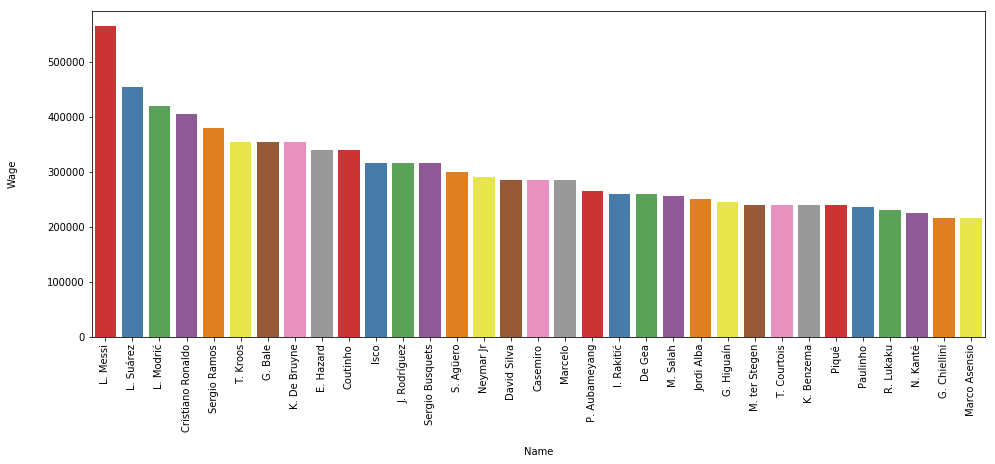

In [235]:
fig, ax = plt.subplots(figsize=(16,6))
sns.barplot(x='Name', y='Wage', data=top_wage_player.head(33), palette='Set1')
ax.set_xlabel(ax.get_xlabel(), labelpad=15)
ax.set_ylabel(ax.get_ylabel(), labelpad=30)
plt.xticks(rotation=90)
plt.show()

As you can see, there exist the zero value, it makes no sense. So, we place them into the median of all players' wage.

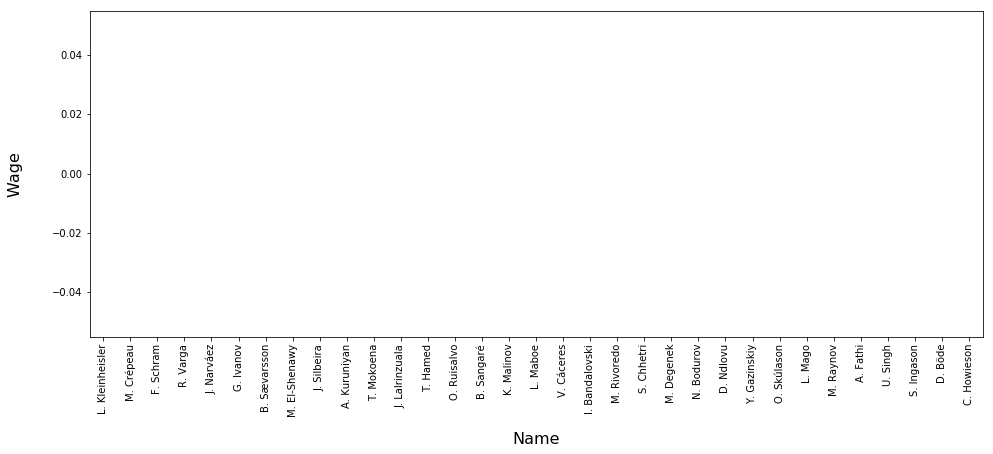

In [236]:
fig, ax = plt.subplots(figsize=(16,6))
sns.barplot(x='Name', y='Wage', data=top_wage_player.tail(33), palette='Set1')
ax.set_xlabel(ax.get_xlabel(), labelpad=15)
ax.set_ylabel(ax.get_ylabel(), labelpad=30)
ax.xaxis.label.set_fontsize(16)
ax.yaxis.label.set_fontsize(16)
plt.xticks(rotation=90)
plt.show()

In [237]:
df['Wage'].median()

3000.0

In [238]:
# Clear the 0 wage with median
df['Wage'][df['Wage'] == 0] = df['Wage'].median()
top_wage_player=df.sort_values('Wage',ascending=False)

/Users/JimmyWang/anaconda3/envs/py3.6/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


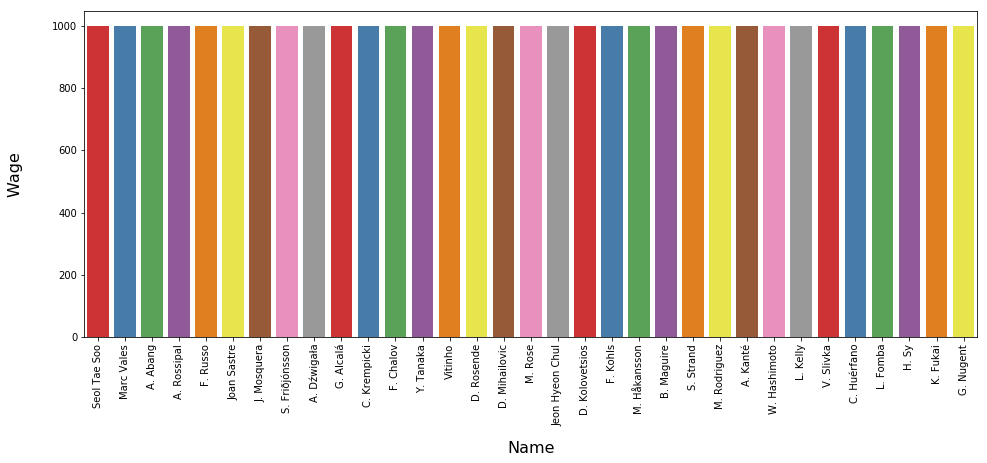

In [239]:
fig, ax = plt.subplots(figsize=(16,6))
sns.barplot(x='Name', y='Wage', data=top_wage_player.tail(33), palette='Set1')
ax.set_xlabel(ax.get_xlabel(), labelpad=15)
ax.set_ylabel(ax.get_ylabel(), labelpad=30)
ax.xaxis.label.set_fontsize(16)
ax.yaxis.label.set_fontsize(16)
plt.xticks(rotation=90)
plt.show()

For now, there is no NaN value and no zero value in Wage column. We can move on to check out the other variables.

## Variables

For processing the other variables, we will first check out whether it contains NaN values, then, investiage whether it has unusual outliers.

### Ages

In [240]:
df['Age']

0        31
1        33
2        26
3        27
4        27
5        27
6        32
7        31
8        32
9        25
10       29
11       28
12       32
13       32
14       27
15       24
16       24
17       27
18       26
19       26
20       29
21       31
22       32
23       30
24       33
25       19
26       26
27       26
28       26
29       27
         ..
18177    18
18178    18
18179    17
18180    22
18181    17
18182    18
18183    44
18184    18
18185    19
18186    20
18187    19
18188    17
18189    18
18190    18
18191    18
18192    18
18193    18
18194    18
18195    18
18196    19
18197    18
18198    18
18199    18
18200    18
18201    18
18202    19
18203    19
18204    16
18205    17
18206    16
Name: Age, Length: 18207, dtype: int64

In [241]:
df['Age'].isnull().sum()

0

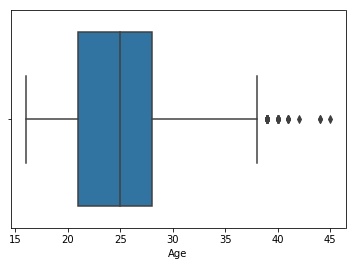

In [242]:
sns.boxplot(df['Age'])

### Overall

In [243]:
df['Overall'].isnull().sum()

0

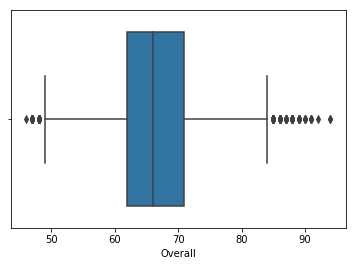

In [244]:
sns.boxplot(df['Overall'])

### Potential

In [245]:
df['Potential'].isnull().sum()

0

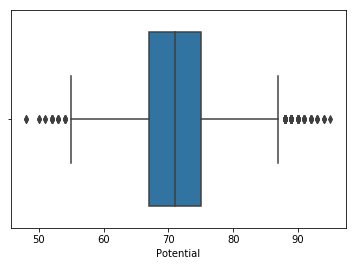

In [246]:
sns.boxplot(df['Potential'])

### Value

Same as wage, value column also has special symbols, so we will do the same processing as wage column. Worthy to mention, some of the value column is million per units, so we also have to take care of the units.

In [247]:
df['Value']

0        €110.5M
1           €77M
2        €118.5M
3           €72M
4          €102M
5           €93M
6           €67M
7           €80M
8           €51M
9           €68M
10          €77M
11        €76.5M
12          €44M
13          €60M
14          €63M
15          €89M
16        €83.5M
17          €78M
18          €58M
19        €53.5M
20        €51.5M
21          €60M
22          €38M
23        €64.5M
24          €27M
25          €81M
26        €69.5M
27        €59.5M
28        €69.5M
29          €62M
          ...   
18177       €70K
18178       €50K
18179       €50K
18180       €40K
18181       €50K
18182       €50K
18183         €0
18184       €40K
18185       €50K
18186       €60K
18187       €40K
18188       €60K
18189       €60K
18190       €60K
18191       €50K
18192       €50K
18193       €50K
18194       €50K
18195       €60K
18196       €60K
18197       €60K
18198       €60K
18199       €70K
18200       €60K
18201       €60K
18202       €60K
18203       €60K
18204       €6

In [248]:
#df['Value'] = df['Value'].str.split('€').str[1].str.split('M').str.split('K').str[0]
# df['Value'].str.split('€').str[1].str.split('M').str[0].str.split('K').str[0]
b = (df['Value'].str.split('€').str[1].str.split('M').str).len() == 2
millions = df['Value'].str.split('€').str[1].str.split('M')[b].str[0].astype('float64')
killions = df['Value'].str.split('€').str[1].str.split('M')[~b].str[0].str.split('K').str[0].astype('float64')
# df['Value'].str.split('€').str[1].str.split('M').str[True]
# (df['Value'].str.split('€').str[1].str.split('M').str).len() == 2

In [249]:
df['Value'][b] = millions * 1000000

/Users/JimmyWang/anaconda3/envs/py3.6/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [250]:
df['Value'][~b] = killions * 1000

/Users/JimmyWang/anaconda3/envs/py3.6/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [251]:
df['Value']

0        1.105e+08
1          7.7e+07
2        1.185e+08
3          7.2e+07
4         1.02e+08
5          9.3e+07
6          6.7e+07
7            8e+07
8          5.1e+07
9          6.8e+07
10         7.7e+07
11        7.65e+07
12         4.4e+07
13           6e+07
14         6.3e+07
15         8.9e+07
16        8.35e+07
17         7.8e+07
18         5.8e+07
19        5.35e+07
20        5.15e+07
21           6e+07
22         3.8e+07
23        6.45e+07
24         2.7e+07
25         8.1e+07
26        6.95e+07
27        5.95e+07
28        6.95e+07
29         6.2e+07
           ...    
18177        70000
18178        50000
18179        50000
18180        40000
18181        50000
18182        50000
18183            0
18184        40000
18185        50000
18186        60000
18187        40000
18188        60000
18189        60000
18190        60000
18191        50000
18192        50000
18193        50000
18194        50000
18195        60000
18196        60000
18197        60000
18198       

We notice that there are also zero value in the Value column, which makes no sense. So, we alikely replace these values by the median of the column.

In [252]:
df['Value'][df['Value'] == 0] = df['Value'].median()

/Users/JimmyWang/anaconda3/envs/py3.6/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [253]:
df['Value'] = df['Value'].astype('float64')

### Preferred Foot

The variable, "Preferred Foot", only have two string value which are "Left" and "Right" so called binary categorical variable.

In [254]:
df['Preferred Foot']

0         Left
1        Right
2        Right
3        Right
4        Right
5        Right
6        Right
7        Right
8        Right
9        Right
10       Right
11       Right
12       Right
13        Left
14       Right
15        Left
16       Right
17        Left
18       Right
19        Left
20       Right
21       Right
22       Right
23       Right
24        Left
25       Right
26        Left
27       Right
28        Left
29       Right
         ...  
18177    Right
18178    Right
18179    Right
18180    Right
18181    Right
18182    Right
18183    Right
18184    Right
18185    Right
18186    Right
18187    Right
18188    Right
18189    Right
18190    Right
18191     Left
18192    Right
18193    Right
18194    Right
18195    Right
18196    Right
18197    Right
18198    Right
18199    Right
18200     Left
18201     Left
18202    Right
18203    Right
18204    Right
18205    Right
18206    Right
Name: Preferred Foot, Length: 18207, dtype: object

In [255]:
df['Preferred Foot'].astype('category').values

[Left, Right, Right, Right, Right, ..., Right, Right, Right, Right, Right]
Length: 18207
Categories (2, object): [Left, Right]

As the aspect of the NaN value, we found there are 48 NaN values in this variable column. Because of small amount, compare to the total observations, we can just ignore these observations.

In [256]:
df['Preferred Foot'].isnull().sum()

48

In [257]:
df['Preferred Foot']

0         Left
1        Right
2        Right
3        Right
4        Right
5        Right
6        Right
7        Right
8        Right
9        Right
10       Right
11       Right
12       Right
13        Left
14       Right
15        Left
16       Right
17        Left
18       Right
19        Left
20       Right
21       Right
22       Right
23       Right
24        Left
25       Right
26        Left
27       Right
28        Left
29       Right
         ...  
18177    Right
18178    Right
18179    Right
18180    Right
18181    Right
18182    Right
18183    Right
18184    Right
18185    Right
18186    Right
18187    Right
18188    Right
18189    Right
18190    Right
18191     Left
18192    Right
18193    Right
18194    Right
18195    Right
18196    Right
18197    Right
18198    Right
18199    Right
18200     Left
18201     Left
18202    Right
18203    Right
18204    Right
18205    Right
18206    Right
Name: Preferred Foot, Length: 18207, dtype: object

In [258]:
df = df[~df['Preferred Foot'].isnull()]

### International Reputation 

International reputation is scored by the number 1 to 5.

In [259]:
df['International Reputation']

0        5.0
1        5.0
2        5.0
3        4.0
4        4.0
5        4.0
6        4.0
7        5.0
8        4.0
9        3.0
10       4.0
11       4.0
12       3.0
13       4.0
14       3.0
15       3.0
16       3.0
17       4.0
18       3.0
19       4.0
20       4.0
21       4.0
22       5.0
23       4.0
24       4.0
25       3.0
26       3.0
27       3.0
28       4.0
29       3.0
        ... 
18177    1.0
18178    1.0
18179    1.0
18180    1.0
18181    1.0
18182    1.0
18183    1.0
18184    1.0
18185    1.0
18186    1.0
18187    1.0
18188    1.0
18189    1.0
18190    1.0
18191    1.0
18192    1.0
18193    1.0
18194    1.0
18195    1.0
18196    1.0
18197    1.0
18198    1.0
18199    1.0
18200    1.0
18201    1.0
18202    1.0
18203    1.0
18204    1.0
18205    1.0
18206    1.0
Name: International Reputation, Length: 18159, dtype: float64

In [260]:
df['International Reputation'].isnull().sum()

0

### Weak Foot

In [261]:
df['Weak Foot']

0        4.0
1        4.0
2        5.0
3        3.0
4        5.0
5        4.0
6        4.0
7        4.0
8        3.0
9        3.0
10       4.0
11       5.0
12       3.0
13       2.0
14       3.0
15       3.0
16       4.0
17       3.0
18       4.0
19       2.0
20       3.0
21       4.0
22       4.0
23       4.0
24       3.0
25       4.0
26       3.0
27       3.0
28       3.0
29       3.0
        ... 
18177    3.0
18178    2.0
18179    3.0
18180    2.0
18181    2.0
18182    3.0
18183    2.0
18184    3.0
18185    3.0
18186    3.0
18187    3.0
18188    3.0
18189    3.0
18190    3.0
18191    3.0
18192    3.0
18193    2.0
18194    3.0
18195    3.0
18196    3.0
18197    3.0
18198    2.0
18199    3.0
18200    2.0
18201    3.0
18202    2.0
18203    2.0
18204    3.0
18205    3.0
18206    3.0
Name: Weak Foot, Length: 18159, dtype: float64

In [262]:
df['Weak Foot'].isnull().sum()

0

### Skill Moves

In [263]:
df['Skill Moves']

0        4.0
1        5.0
2        5.0
3        1.0
4        4.0
5        4.0
6        4.0
7        3.0
8        3.0
9        1.0
10       4.0
11       3.0
12       2.0
13       4.0
14       2.0
15       4.0
16       3.0
17       4.0
18       1.0
19       1.0
20       3.0
21       3.0
22       1.0
23       4.0
24       2.0
25       5.0
26       4.0
27       2.0
28       4.0
29       4.0
        ... 
18177    2.0
18178    1.0
18179    2.0
18180    1.0
18181    2.0
18182    2.0
18183    1.0
18184    2.0
18185    2.0
18186    2.0
18187    2.0
18188    2.0
18189    2.0
18190    2.0
18191    2.0
18192    2.0
18193    2.0
18194    1.0
18195    2.0
18196    2.0
18197    2.0
18198    1.0
18199    2.0
18200    2.0
18201    2.0
18202    2.0
18203    2.0
18204    2.0
18205    2.0
18206    2.0
Name: Skill Moves, Length: 18159, dtype: float64

In [264]:
df['Skill Moves'].isnull().sum()

0

### Height

For the height, we change feets to inches.

In [265]:
df['Height']

0         5'7
1         6'2
2         5'9
3         6'4
4        5'11
5         5'8
6         5'8
7         6'0
8         6'0
9         6'2
10        6'0
11        6'0
12        6'2
13        5'8
14        5'6
15       5'10
16        6'2
17        5'9
18        6'2
19        6'6
20        6'2
21        6'1
22        6'4
23        5'8
24        6'2
25       5'10
26        5'9
27        6'1
28       5'11
29        5'4
         ... 
18177    5'10
18178     6'0
18179     6'2
18180     6'1
18181    5'11
18182    5'10
18183     6'2
18184     6'1
18185    5'11
18186    5'10
18187    5'10
18188    5'10
18189    5'10
18190     5'9
18191    5'11
18192     6'1
18193     5'8
18194     6'3
18195     5'8
18196     5'7
18197    5'10
18198    5'11
18199     5'6
18200     5'9
18201     6'1
18202     5'9
18203     6'3
18204     5'8
18205    5'10
18206    5'10
Name: Height, Length: 18159, dtype: object

In [266]:
df['Height'].isnull().sum()

0

In [267]:
h = df['Height'].str.split('\'')

In [268]:
df['Height'] = h.str[0].astype('int64')*12 + h.str[1].astype('int64')

### Weight

In [269]:
df['Weight']

0        159lbs
1        183lbs
2        150lbs
3        168lbs
4        154lbs
5        163lbs
6        146lbs
7        190lbs
8        181lbs
9        192lbs
10       176lbs
11       168lbs
12       172lbs
13       148lbs
14       159lbs
15       165lbs
16       196lbs
17       161lbs
18       187lbs
19       212lbs
20       168lbs
21       170lbs
22       203lbs
23       154lbs
24       187lbs
25       161lbs
26       157lbs
27       185lbs
28       172lbs
29       130lbs
          ...  
18177    163lbs
18178    176lbs
18179    163lbs
18180    172lbs
18181    134lbs
18182    165lbs
18183    190lbs
18184    179lbs
18185    159lbs
18186    174lbs
18187    161lbs
18188    148lbs
18189    165lbs
18190    176lbs
18191    168lbs
18192    165lbs
18193    146lbs
18194    187lbs
18195    141lbs
18196    146lbs
18197    141lbs
18198    154lbs
18199    150lbs
18200    157lbs
18201    168lbs
18202    134lbs
18203    170lbs
18204    148lbs
18205    154lbs
18206    176lbs
Name: Weight, Length: 18

In [270]:
df['Weight'].isnull().sum()

0

In [271]:
df['Weight'] = df['Weight'].str.split('lbs').str[0].astype('int64')

### Postion

Then, there are several positions have been scored for each player. The score is from 0 to 100. We convert the string into float number and replace the NaN value with the median of each column.

In [272]:
position = df[['LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW', 'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM', 'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB']]

In [273]:
position.isnull().sum().sum()

52962

In [274]:
position

,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,...,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB
0,88+2,88+2,88+2,92+2,93+2,93+2,93+2,92+2,93+2,93+2,...,64+2,61+2,61+2,61+2,64+2,59+2,47+2,47+2,47+2,59+2
1,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,...,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3
2,84+3,84+3,84+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,...,65+3,60+3,60+3,60+3,65+3,60+3,47+3,47+3,47+3,60+3
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,82+3,82+3,82+3,87+3,87+3,87+3,87+3,87+3,88+3,88+3,...,77+3,77+3,77+3,77+3,77+3,73+3,66+3,66+3,66+3,73+3
5,83+3,83+3,83+3,89+3,88+3,88+3,88+3,89+3,89+3,89+3,...,66+3,63+3,63+3,63+3,66+3,60+3,49+3,49+3,49+3,60+3
6,77+3,77+3,77+3,85+3,84+3,84+3,84+3,85+3,87+3,87+3,...,82+3,81+3,81+3,81+3,82+3,79+3,71+3,71+3,71+3,79+3
7,87+5,87+5,87+5,86+5,87+5,87+5,87+5,86+5,85+5,85+5,...,69+5,68+5,68+5,68+5,69+5,66+5,63+5,63+5,63+5,66+5
8,73+3,73+3,73+3,70+3,71+3,71+3,71+3,70+3,71+3,71+3,...,81+3,84+3,84+3,84+3,81+3,84+3,87+3,87+3,87+3,84+3
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [275]:
# Convert 45+2 into 47 (int64)
for x in position:
    n = position[x][~position[x].isnull()].str.split('+')
    df[x] = n.str[0].astype('int64') + n.str[1].astype('int64')
    df[x][df[x].isnull()] = df[x].median()

/Users/JimmyWang/anaconda3/envs/py3.6/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


### Crossing

In [276]:
df['Crossing']

0        84.0
1        84.0
2        79.0
3        17.0
4        93.0
5        81.0
6        86.0
7        77.0
8        66.0
9        13.0
10       62.0
11       88.0
12       55.0
13       84.0
14       68.0
15       82.0
16       75.0
17       82.0
18       15.0
19       14.0
20       62.0
21       70.0
22       15.0
23       70.0
24       58.0
25       77.0
26       78.0
27       52.0
28       90.0
29       86.0
         ... 
18177    32.0
18178    10.0
18179    25.0
18180    19.0
18181    45.0
18182    35.0
18183    11.0
18184    33.0
18185    37.0
18186    35.0
18187    39.0
18188    41.0
18189    37.0
18190    32.0
18191    47.0
18192    39.0
18193    36.0
18194    10.0
18195    35.0
18196    31.0
18197    44.0
18198    14.0
18199    31.0
18200    28.0
18201    22.0
18202    34.0
18203    23.0
18204    25.0
18205    44.0
18206    41.0
Name: Crossing, Length: 18159, dtype: float64

In [277]:
df['Crossing'].isnull().sum()

0

### Finishing

In [278]:
df['Finishing']

0        95.0
1        94.0
2        87.0
3        13.0
4        82.0
5        84.0
6        72.0
7        93.0
8        60.0
9        11.0
10       91.0
11       76.0
12       42.0
13       76.0
14       65.0
15       84.0
16       94.0
17       90.0
18       14.0
19       14.0
20       67.0
21       89.0
22       13.0
23       93.0
24       33.0
25       88.0
26       90.0
27       59.0
28       83.0
29       77.0
         ... 
18177    53.0
18178     7.0
18179    22.0
18180    15.0
18181    46.0
18182    33.0
18183    12.0
18184    24.0
18185    34.0
18186    29.0
18187    40.0
18188    38.0
18189    48.0
18190    32.0
18191    26.0
18192    36.0
18193    25.0
18194     6.0
18195    29.0
18196    28.0
18197    44.0
18198     8.0
18199    31.0
18200    47.0
18201    23.0
18202    38.0
18203    52.0
18204    40.0
18205    50.0
18206    34.0
Name: Finishing, Length: 18159, dtype: float64

In [279]:
df['Finishing'].isnull().sum()

0

### HeadingAccuracy

In [280]:
df['HeadingAccuracy'].isnull().sum()

0

### ShortPassing

In [281]:
df['ShortPassing'].isnull().sum()

0

### Volleys

In [282]:
df['Volleys'].isnull().sum()

0

### Dribbling

In [283]:
df['Dribbling'].isnull().sum()

0

### Curve

In [284]:
df['Curve'].isnull().sum()

0

### FKAccuracy

In [285]:
df['FKAccuracy'].isnull().sum()

0

### LongPassing

In [286]:
df['LongPassing'].isnull().sum()

0

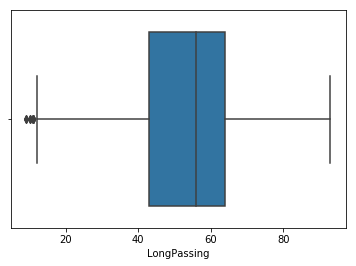

In [287]:
sns.boxplot(df['LongPassing'])

### BallControl

In [288]:
df['BallControl'].isnull().sum()

0

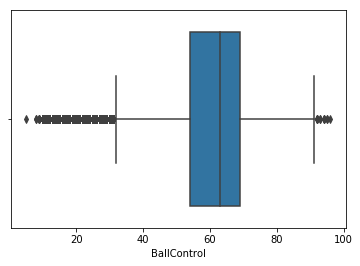

In [289]:
sns.boxplot(df['BallControl'])

### Acceleration

In [290]:
df['Acceleration'].isnull().sum()

0

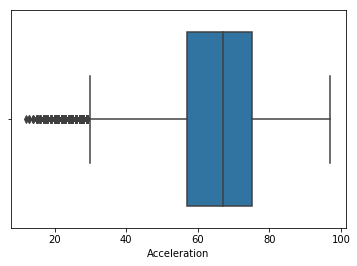

In [291]:
sns.boxplot(df['Acceleration'])

### SprintSpeed

In [292]:
df['SprintSpeed'].isnull().sum()

0

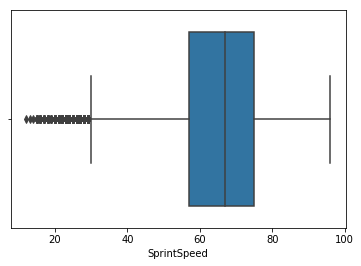

In [293]:
sns.boxplot(df['SprintSpeed'])

### Agility

In [294]:
df['Agility'].isnull().sum()

0

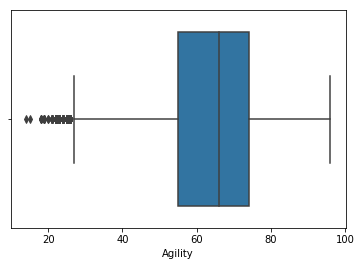

In [295]:
sns.boxplot(df['Agility'])

### Reactions

In [296]:
df['Reactions'].isnull().sum()

0

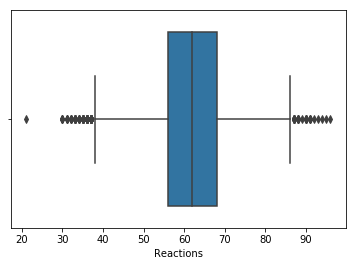

In [297]:
sns.boxplot(df['Reactions'])

### Balance

In [298]:
df['Balance'].isnull().sum()

0

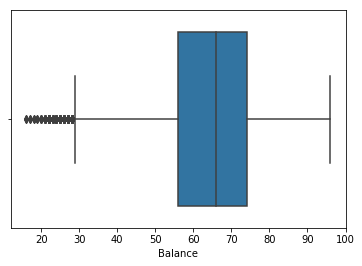

In [299]:
sns.boxplot(df['Balance'])

In [300]:
df.isnull().sum().sum()

0

## Correlation

In [301]:
wage_corr_seq = (df.corr()['Wage']).sort_values(ascending=False).drop('Wage')
wage_corr_seq

Value                       0.858216
International Reputation    0.668855
Overall                     0.572363
Reactions                   0.496137
Potential                   0.486711
RCM                         0.436270
LCM                         0.436270
CM                          0.436270
Composure                   0.419800
LS                          0.396013
ST                          0.396013
RS                          0.396013
LAM                         0.392832
CAM                         0.392832
RAM                         0.392832
LM                          0.390451
RM                          0.390451
LF                          0.385969
CF                          0.385969
RF                          0.385969
RW                          0.370526
LW                          0.370526
Special                     0.348012
LWB                         0.337174
RWB                         0.337174
LDM                         0.317811
CDM                         0.317811
R

In [302]:
x = df[['Wage', 'International Reputation','Overall','Reactions','Potential','LCM','Composure','LS']]

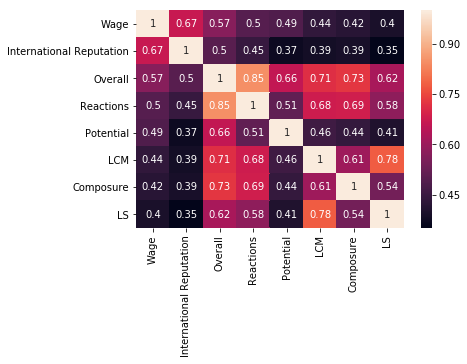

In [303]:
sns.heatmap(x.corr(), annot=True)

In [1]:
fig, axes = plt.subplots(nrows=5, ncols=5, figsize=(10,10))
plt.subplots_adjust(hspace=0.4)

corr_to_wage = pd.Series()
for col in df.columns.values[2:]:
    if (((col!='Wage') & (col!='Name') & (col!='Preferred Foot'))):
        corr_to_wage[col] = df['Wage'].corr(df[col])
abs_corr_to_wage = corr_to_wage.abs().sort_values(ascending=False)
corr_to_wage = corr_to_wage.loc[abs_corr_to_wage.index]

for i in range(5):
    for j in range(5):
        sns.regplot(x=corr_to_wage.index.values[i*5+j], y='Wage', data=df,
                   ax=axes[i,j], fit_reg=False, marker='.')
        title = 'correlation='+str(corr_to_wage[i*5+j])
        axes[i,j].set_title(title)
axes[1,2].set_xlim(0,102)
plt.show()

NameError: name 'plt' is not defined

## Dummy Variables

We use dummy variables for the Preferred Foot feature, which is also a binary variable. Latter on, we set preferred foot, left, as one for our models.

In [305]:
df['Preferred Foot']

0         Left
1        Right
2        Right
3        Right
4        Right
5        Right
6        Right
7        Right
8        Right
9        Right
10       Right
11       Right
12       Right
13        Left
14       Right
15        Left
16       Right
17        Left
18       Right
19        Left
20       Right
21       Right
22       Right
23       Right
24        Left
25       Right
26        Left
27       Right
28        Left
29       Right
         ...  
18177    Right
18178    Right
18179    Right
18180    Right
18181    Right
18182    Right
18183    Right
18184    Right
18185    Right
18186    Right
18187    Right
18188    Right
18189    Right
18190    Right
18191     Left
18192    Right
18193    Right
18194    Right
18195    Right
18196    Right
18197    Right
18198    Right
18199    Right
18200     Left
18201     Left
18202    Right
18203    Right
18204    Right
18205    Right
18206    Right
Name: Preferred Foot, Length: 18159, dtype: object

In [306]:
pd.get_dummies(df['Preferred Foot'])

,Left,Right
0,1,0
1,0,1
2,0,1
3,0,1
4,0,1
5,0,1
6,0,1
7,0,1
8,0,1
9,0,1


In [307]:
df = pd.concat([df, pd.get_dummies(df['Preferred Foot'])], axis=1)

In [308]:
df['Left']

0        1
1        0
2        0
3        0
4        0
5        0
6        0
7        0
8        0
9        0
10       0
11       0
12       0
13       1
14       0
15       1
16       0
17       1
18       0
19       1
20       0
21       0
22       0
23       0
24       1
25       0
26       1
27       0
28       1
29       0
        ..
18177    0
18178    0
18179    0
18180    0
18181    0
18182    0
18183    0
18184    0
18185    0
18186    0
18187    0
18188    0
18189    0
18190    0
18191    1
18192    0
18193    0
18194    0
18195    0
18196    0
18197    0
18198    0
18199    0
18200    1
18201    1
18202    0
18203    0
18204    0
18205    0
18206    0
Name: Left, Length: 18159, dtype: uint8

## Modeling

### Training and Testing

For the features choosing, we pick the first eleven features from the wage correlation order sequence. Then, we first check which models are overfitting or which are underfitting.
After training, we plot the error diagram for each models in order to get the minimum error model. Also, we set the number of the features should equal or larger than five.

In [309]:
featureOrder = ['Wage','Left','International Reputation','Overall','Reactions','Potential','LCM','Composure','LS', 'ST', 'RS', 'CAM']

In [331]:
def buildModel_SR(a):
    # This function build the model and choose the features.
    scores = []
    models = []
    train_X = []
    train_Y = []
    test_X = []
    test_Y = []
    train_pred_YY = []
    test_pred_YY = []

    for i in range(0, len(a)):
        train, test = train_test_split(df, test_size=0.5, shuffle=True)
        training_features = featureOrder[0:i+1]
        target = 'Wage'
        train_X.append(train[training_features])
        train_Y.append(train[target])
        test_X.append(test[training_features])
        test_Y.append(test[target])
        model = LinearRegression(normalize=True)
        model.fit(train[training_features], train[target])
        train_pred_Y = model.predict(train[training_features])
        test_pred_Y = model.predict(test[training_features])
        train_pred_YY.append(pd.Series(train_pred_Y.clip(0, train_pred_Y.max()), index=train[target].index))
        test_pred_YY.append(pd.Series(test_pred_Y.clip(0, test_pred_Y.max()), index=test[target].index))
        models.append(model)
        s = model.score(test[training_features], test[target])
        scores.append(s)

    return [scores, models, train_X, train_Y, test_X, test_Y, 
            train_pred_YY, test_pred_YY]

In [332]:
def buildModel_CV(a):
    # This function build the model and choose the features by Cross Validation 
    crossValidation = []
    models = []
    train_X = []
    train_Y = []
    test_X = []
    test_Y = []
    train_pred_YY = []
    test_pred_YY = []

    for i in range(0, len(a)):
        train, test = train_test_split(df, test_size=0.3, shuffle=True)
        training_features = featureOrder[0:i+1]
        target = 'Wage'
        train_X.append(train[training_features])
        train_Y.append(train[target])
        test_X.append(test[training_features])
        test_Y.append(test[target])
        model = LinearRegression(normalize=True)
        model.fit(train[training_features], train[target])
        train_pred_Y = model.predict(train[training_features])
        test_pred_Y = model.predict(test[training_features])
        train_pred_YY.append(pd.Series(train_pred_Y.clip(0, train_pred_Y.max()), index=train[target].index))
        test_pred_YY.append(pd.Series(test_pred_Y.clip(0, test_pred_Y.max()), index=test[target].index))
        models.append(model)
    
        crossValidation.append(cross_val_score(model, df[target], df[training_features], scoring='accuracy'))

    return [crossValidation, models, train_X, train_Y, test_X, test_Y, 
            train_pred_YY, test_pred_YY]

In [333]:
[scores, models, train_X, train_Y, test_X, test_Y, 
            train_pred_YY, test_pred_YY] = buildModel_SR(featureOrder)

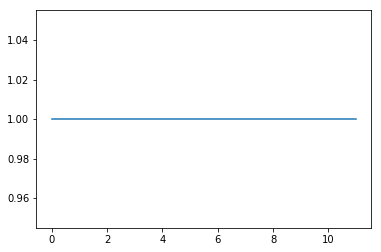

In [334]:
plt.plot(scores)

As the mean sqart root, we found the seven features model has the less error value. So, we will choose this model.

In [ ]:
while rmse_test.index(min(rmse_test)) < 5:
    [scores, models, train_X, train_Y, test_X, test_Y, 
            train_pred_YY, test_pred_YY] = buildModel_SR(featureOrder)
plt.plot(scores)
orderIndex = rmse_test.index(max(scores))

In [ ]:
orderIndex

In [ ]:
# [crossValidation, models, train_X, train_Y, test_X, test_Y, 
#             train_pred_YY, test_pred_YY] = buildModel_CV(featureOrder)

In [ ]:
# print(crossValidation)

## Significant

In this section, we check if the features of the choosing model are significant.

In [ ]:
modelFeature = featureOrder[1:orderIndex]

In [ ]:
modelFeature

In [ ]:
# ttt = stats.ttest_ind(df[modelFeature],df[modelFeature])

for i in modelFeature:
    t, p = stats.ttest_ind(df[i], df[modelFeature])
    print(p)

As a result, it seems that the features are significant.

### model assumptions violated?

In [ ]:
plt.scatter(train_Y[orderIndex].index.values, train_Y[orderIndex])
plt.scatter(test_Y[orderIndex].index.values, test_Y[orderIndex])

As the result shown above, we can see that the blue dots are the training result and the orange dots are the testing data result. Two of the results are almost matching, so that we can assume that the model assumption doesn't violate.

Then, we look closely to the features of the choosing model.

In [ ]:
modelFeature

In [ ]:
# train_pred_YY[orderIndex]
# train_pred_YY[orderIndex].index(max(train_pred_YY[orderIndex]))

maxTarIndex = train_pred_YY[orderIndex][train_pred_YY[orderIndex]==max(train_pred_YY[orderIndex])].index.values.astype(int)[0]
# for i in train_pred_YY[orderIndex]:
#     if 
# max(train_pred_YY[orderIndex])

In [ ]:
df.loc[maxTarIndex]

In [ ]:
df.loc[maxTarIndex][modelFeature]

In [ ]:
max(df['International Reputation'])

In [ ]:
max(df['Overall'])

In [ ]:
max(df['Reactions'])

In [ ]:
max(df['Potential'])

In [ ]:
max(df['LCM'])

We find out the highest wage of all players, who is L. Messi, and investigate the features. We found that the values of the features of L. Messi are all top. So, we can assume the model makes sense.